# Diabetes Prediction using Machine Learning

## Project Overview

This notebook aims to build a predictive model to determine whether a patient is diabetic based on diagnostic medical measurements. The dataset used is the **PIMA Indians Diabetes Dataset**, which contains various health-related features collected from female patients of Pima Indian heritage.

### Features Used:
1. **Pregnancies** – Number of times the patient has been pregnant  
2. **Glucose** – Plasma glucose concentration (mg/dl)  
3. **Blood Pressure** – Diastolic blood pressure (mm Hg)  
4. **Skin Thickness** – Triceps skin fold thickness (mm)  
5. **Insulin** – 2-hour serum insulin (mu U/ml)  
6. **BMI** – Body Mass Index (weight in kg / height in m²)  
7. **Diabetes Pedigree Function** – Probability of diabetes based on family history  
8. **Age** – Age of the patient (in years)


### Dataset Summary

The dataset used is from the **National Institute of Diabetes and Digestive and Kidney Diseases**, consisting of 768 female patients. The target variable (`Outcome`) indicates whether or not the patient has diabetes (1 = diabetic, 0 = non-diabetic).

### Models Applied
We apply and compare the performance of the following machine learning models:

1. **Support Vector Machine (SVM)** – effective for small- to medium-sized datasets with clear class separation  
2. **Random Forest Classifier** – an ensemble tree-based model known for its robustness and high accuracy


On the basis of their accuracy score, we will choose the best fit model and make our predictive system.

# Importing the Dependencies 

Libraries Required : Numpy, Pandas, ScikitLearn, Matplotlib, Seaborn

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Collection

Data used: PIMA Diabetes Dataset

In [38]:
df = pd.read_csv('diabetes (1).csv')

In [39]:
#printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
#number of rows and columns in the dataset
df.shape

(768, 9)

In [41]:
#getting the statistical meausre of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
#value count of each class
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 -> Non-Diabetic

1 -> Diabetic

In [43]:
#getting the statistical meausre of data for non-daibetes patients
df[df['Outcome'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [44]:
#getting the statistical meausre of data for daibetes patients
df[df['Outcome'] == 1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [45]:
#mean of each class
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [46]:
#separating the data and labels
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

In [47]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [48]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Preprocessing

### Insulin

In [49]:
print((df['Insulin'] == 0).sum())

374


In [50]:
df[df['Insulin'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,374.000000,374.000000,374.000000,374.000000,374.0,374.000000,374.000000,374.000000,374.000000
mean,4.433155,119.409091,67.473262,11.508021,0.0,30.943316,0.415340,35.796791,0.368984
std,3.437621,32.544233,24.522312,15.738605,0.0,8.419854,0.300547,12.729034,0.483176
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.250000,64.000000,0.000000,0.0,26.500000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,0.000000,0.0,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,26.750000,0.0,35.675000,0.553250,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,0.0,52.900000,1.893000,72.000000,1.000000


In [51]:
df['Insulin'] = df['Insulin'].replace(0, np.nan)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

<Axes: xlabel='Insulin', ylabel='Count'>

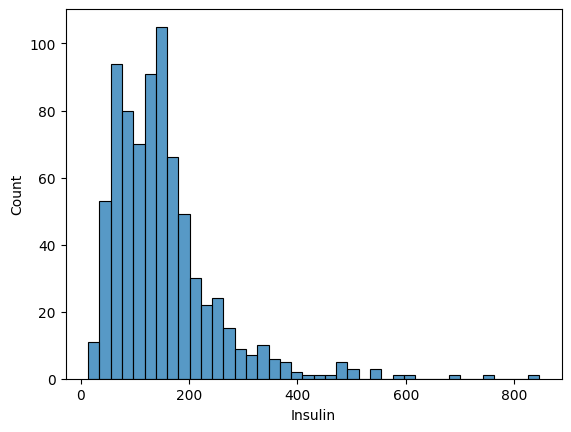

In [52]:
sns.histplot(df['Insulin'])

### SkinThickness

In [53]:
print((df['SkinThickness'] == 0).sum())

227


<Axes: ylabel='Frequency'>

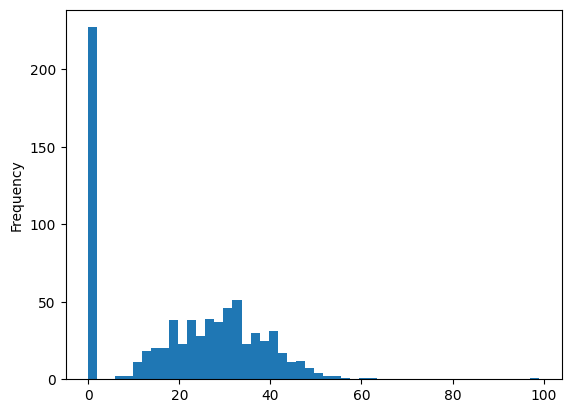

In [54]:
df['SkinThickness'].plot(kind = 'hist',bins = 50)

In [55]:
df[df['SkinThickness'] == 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,227.000000,227.000000,227.000000,227.0,227.000000,227.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,64.118943,0.0,150.779736,30.129956,0.393291,37.251101,0.387665
std,3.350062,29.572931,28.839945,0.0,60.882900,9.168249,0.276871,13.062933,0.488294
min,0.000000,44.000000,0.000000,0.0,45.400000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,62.000000,0.0,109.100000,25.150000,0.203000,27.000000,0.000000
50%,4.000000,120.000000,72.000000,0.0,149.400000,30.400000,0.282000,34.000000,0.000000
75%,7.000000,140.500000,80.000000,0.0,180.000000,35.050000,0.536500,45.000000,1.000000
max,13.000000,197.000000,122.000000,0.0,363.200000,52.900000,1.781000,72.000000,1.000000


In [56]:
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

<Axes: ylabel='Frequency'>

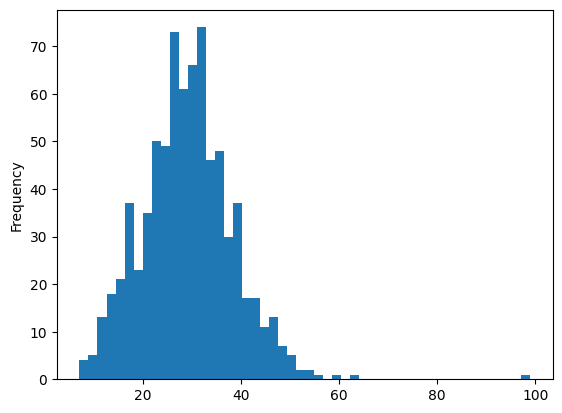

In [57]:
df['SkinThickness'].plot(kind = 'hist',bins = 50)

<Axes: ylabel='SkinThickness'>

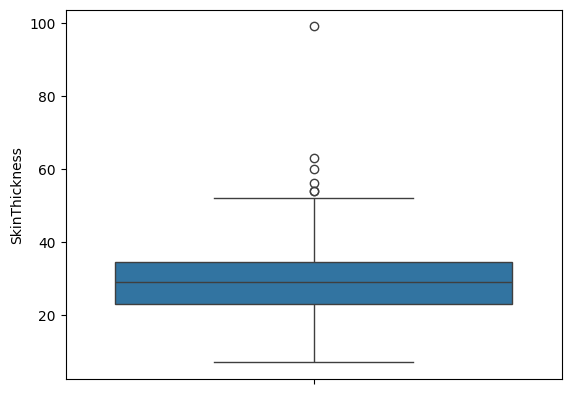

In [58]:
sns.boxplot(df['SkinThickness'])

### Glucose,BMI,BloodPressure

In [59]:
print((df['Glucose'] == 0).sum())

5


In [60]:
print((df['BloodPressure'] == 0).sum())

35


In [61]:
print((df['BMI'] == 0).sum())

11


In [62]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [63]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())

In [64]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

# Data Analysis

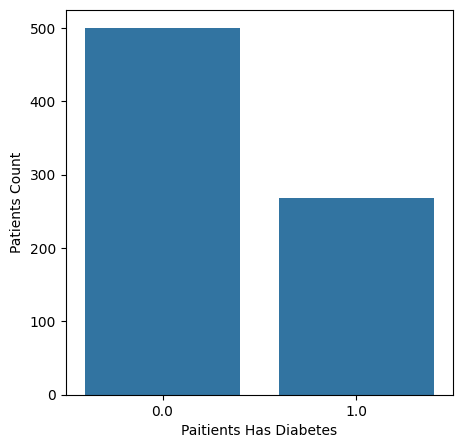

In [65]:
#plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(5,5))
sns.countplot(x ='Outcome', data=df)
plt.xlabel('Paitients Has Diabetes')
plt.ylabel('Patients Count')
plt.show()

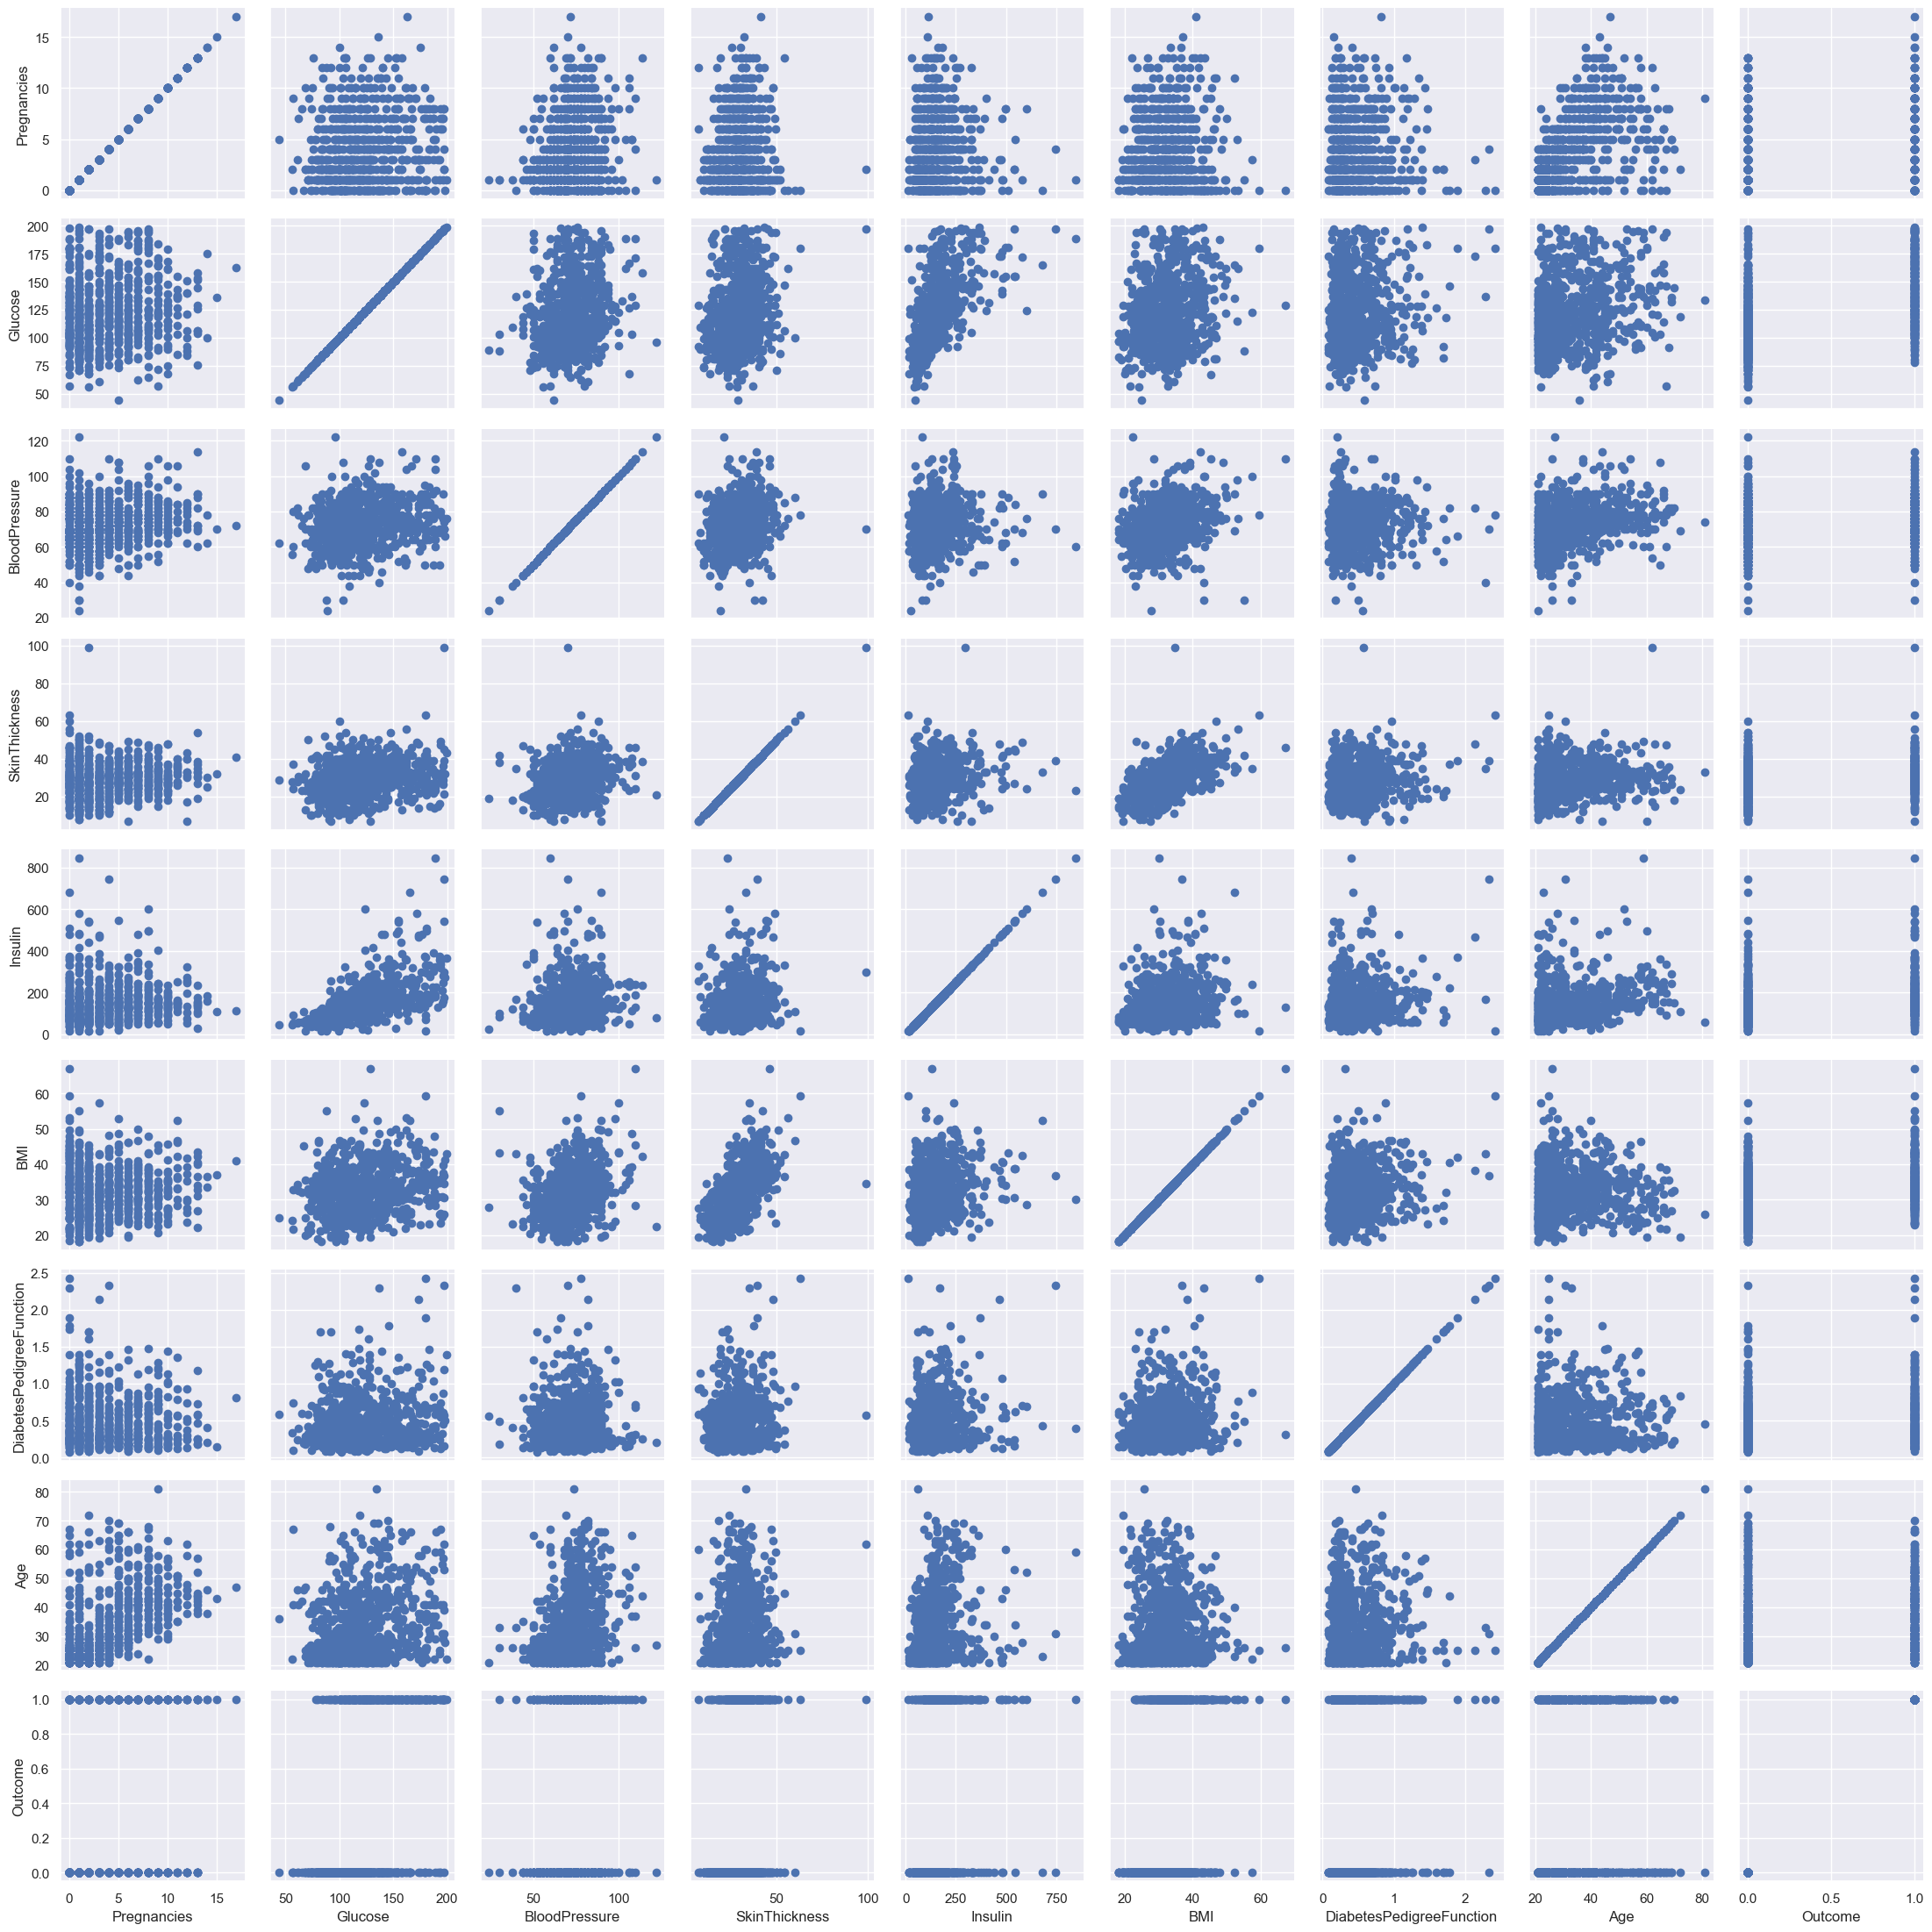

In [66]:
sns.set(style='darkgrid')
species_col = sns.PairGrid(df)
species_col.map(plt.scatter)

Check for Null values

In [67]:
print (df.isnull().values.any())

False


Analyzing Attributes Distribution

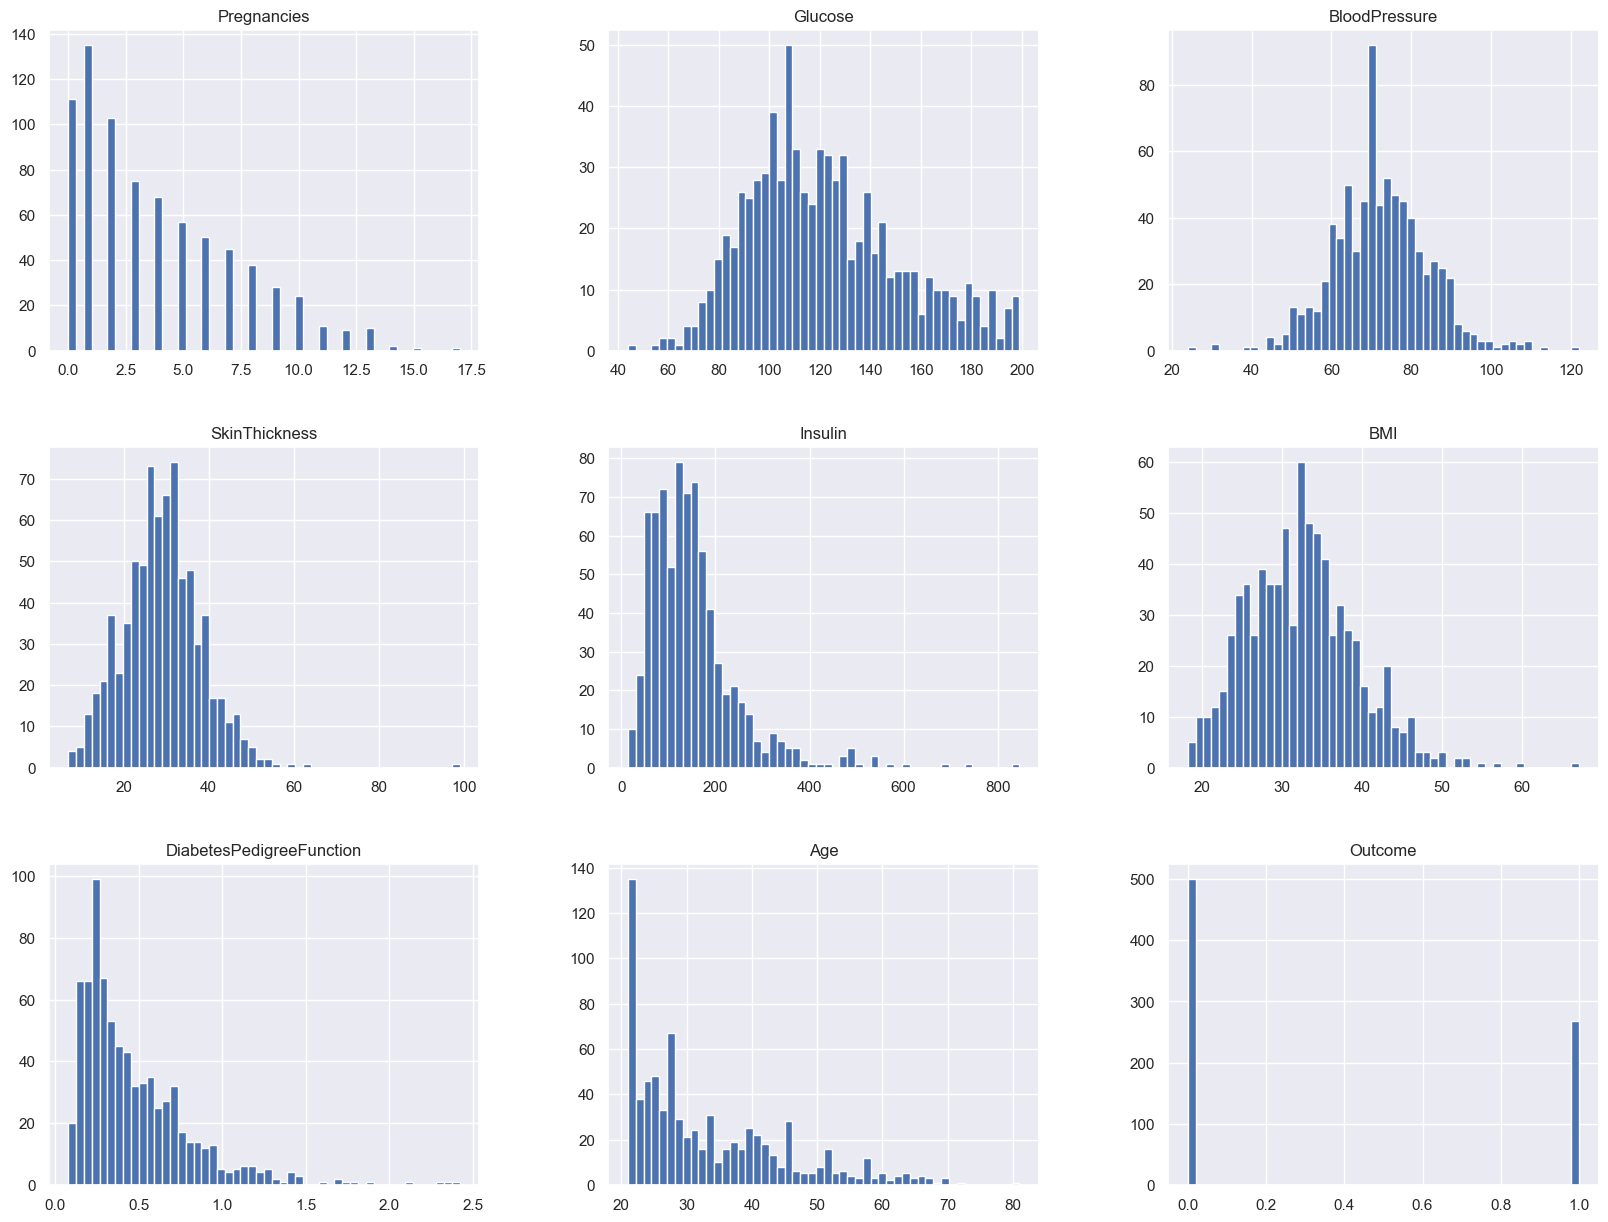

In [68]:
# Histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

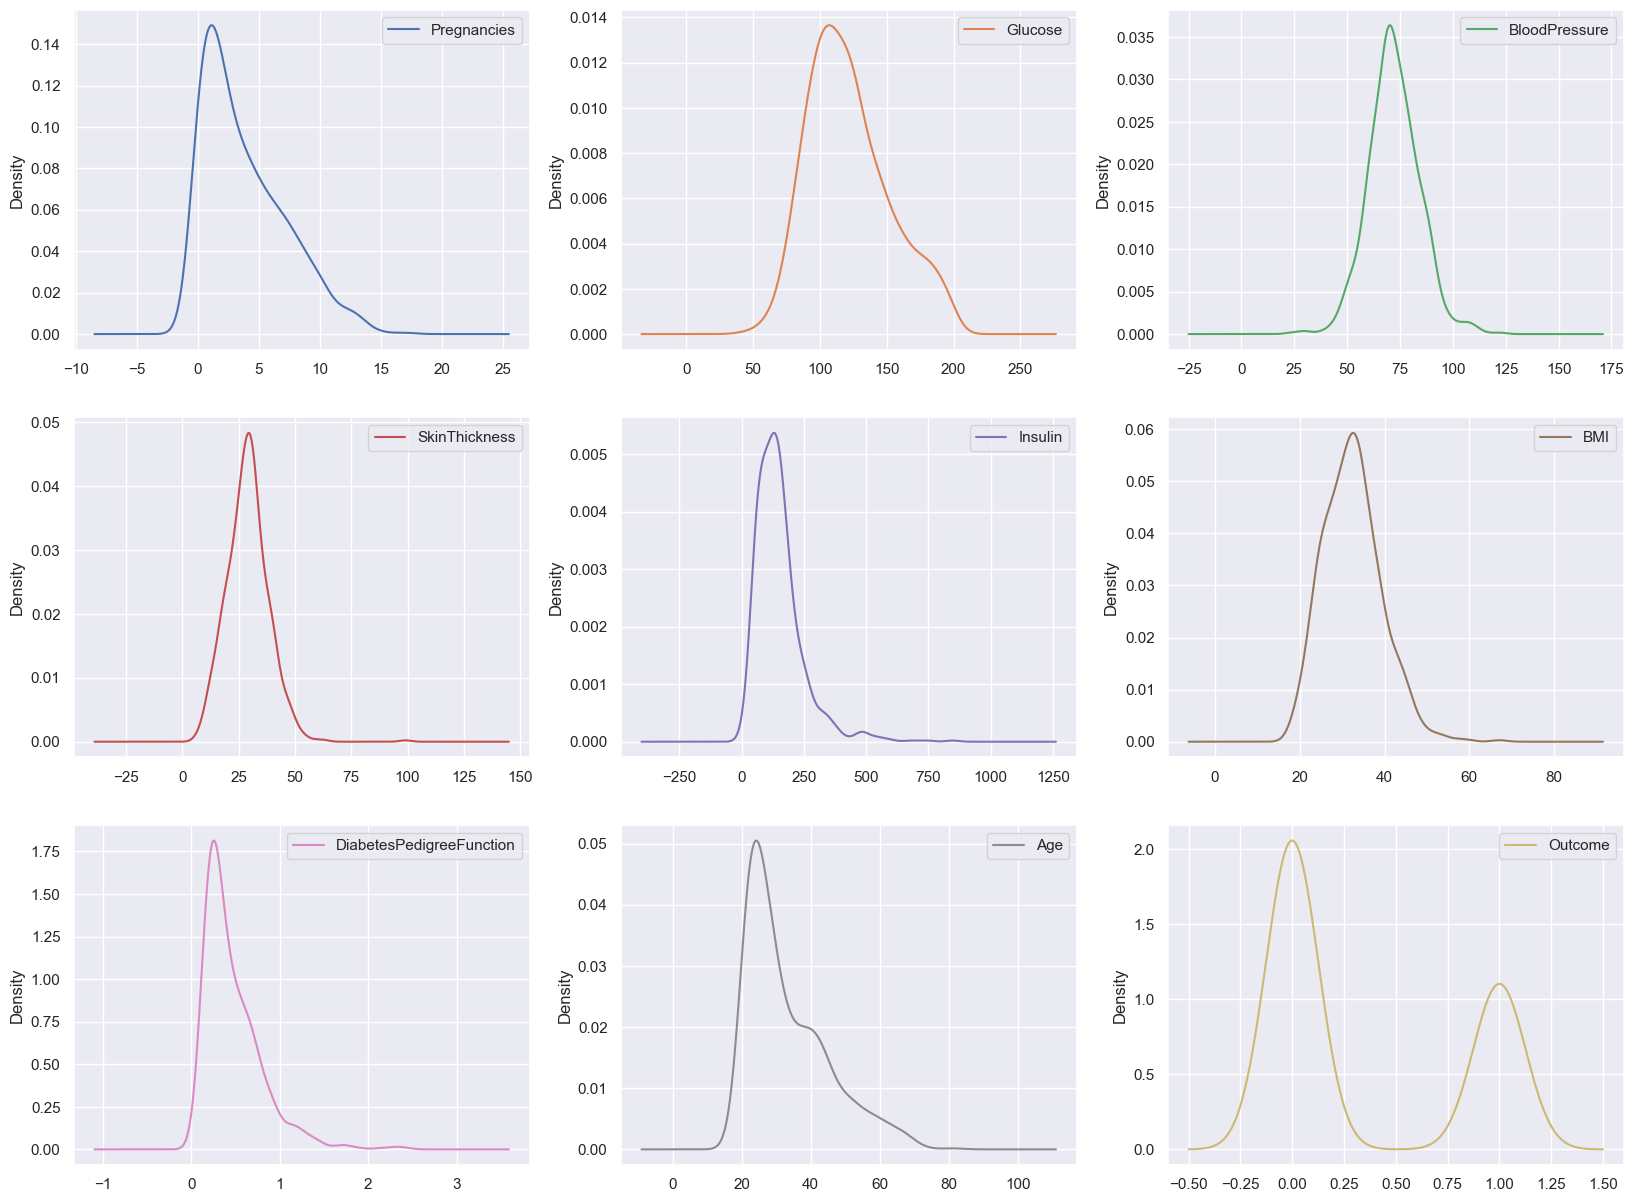

In [69]:
# Density plots for all attributes to visualize the distribution of each attribute
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

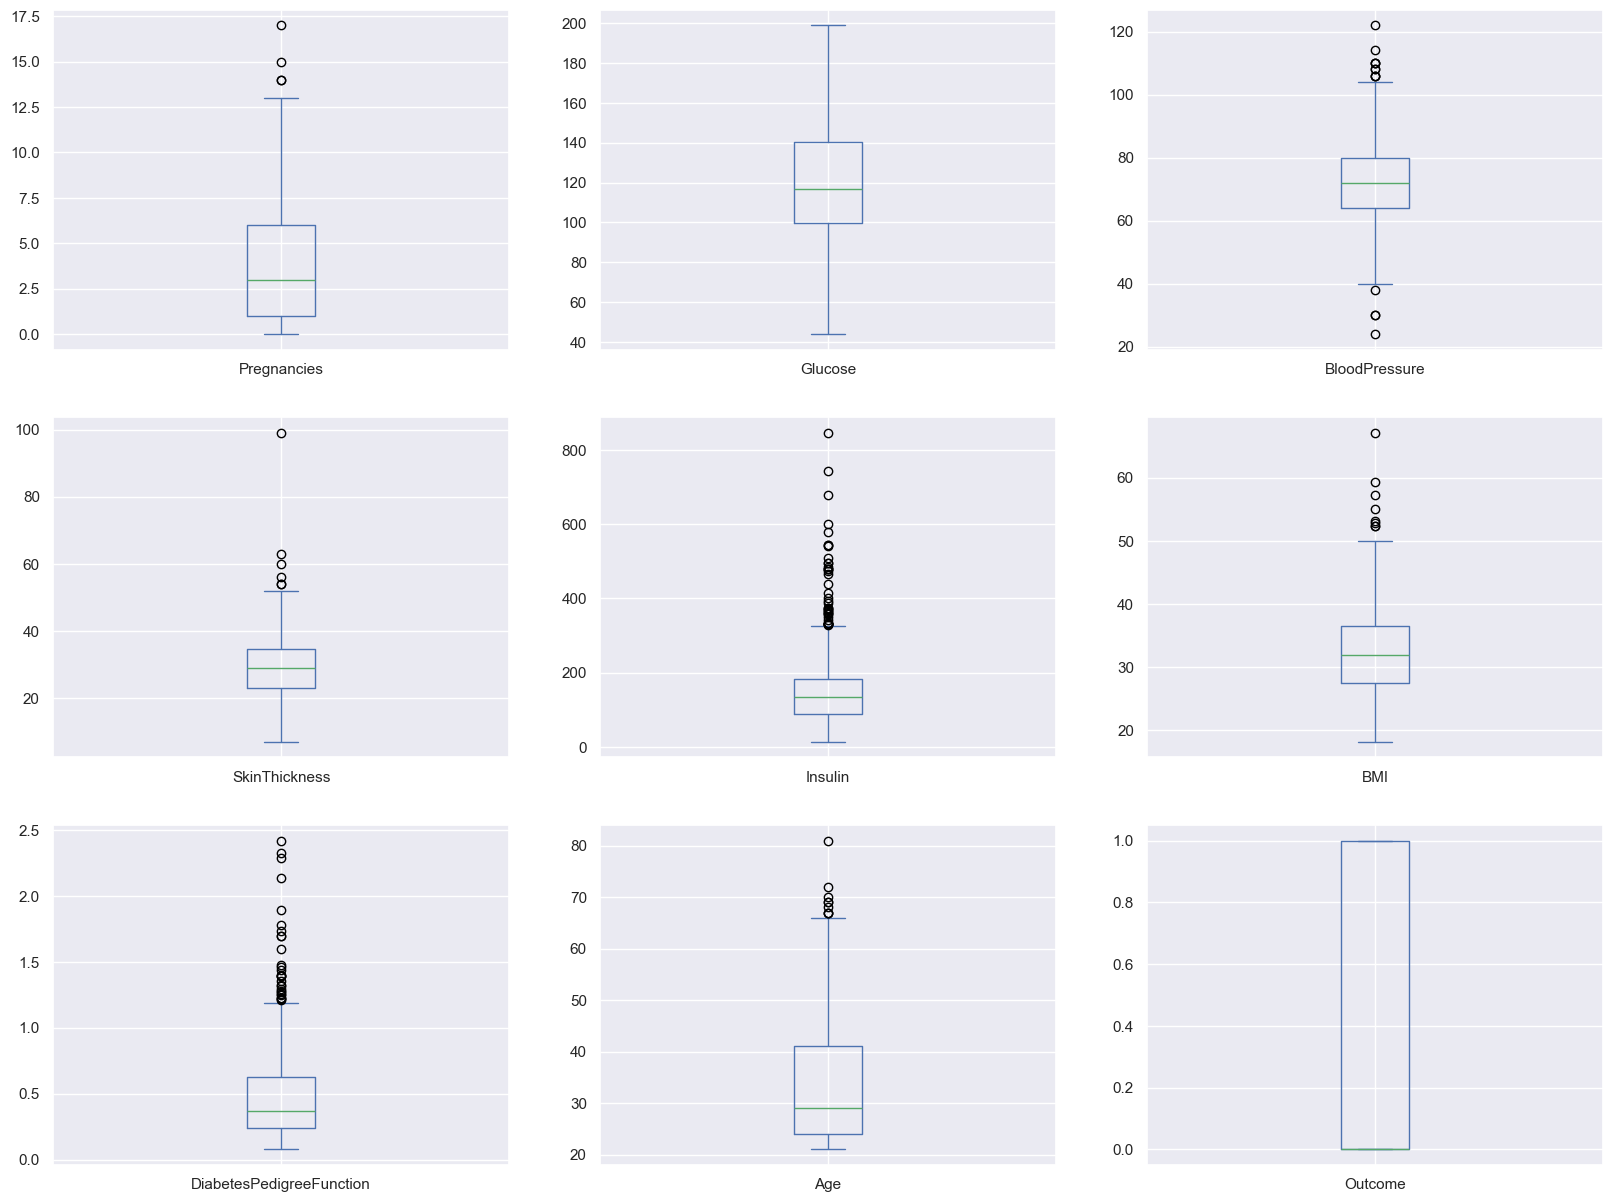

In [70]:
#Box and Whisker plot to visualize the distribution of all atributes
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

## Checking Correlation between each factors

In [71]:
#evaluating correlation coefficient between each factors
corr_analysis = df.corr()
corr_analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.098015,0.055948,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.229994,0.614325,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.241112,0.131495,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.098015,0.229994,0.241112,1.000000,0.250385,0.585398,0.114266,0.168414,0.244722
Insulin,0.055948,0.614325,0.131495,0.250385,1.000000,0.242488,0.135222,0.229139,0.313507
BMI,0.021546,0.231478,0.281231,0.585398,0.242488,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.114266,0.135222,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.168414,0.229139,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.244722,0.313507,0.312254,0.173844,0.238356,1.000000


<Axes: >

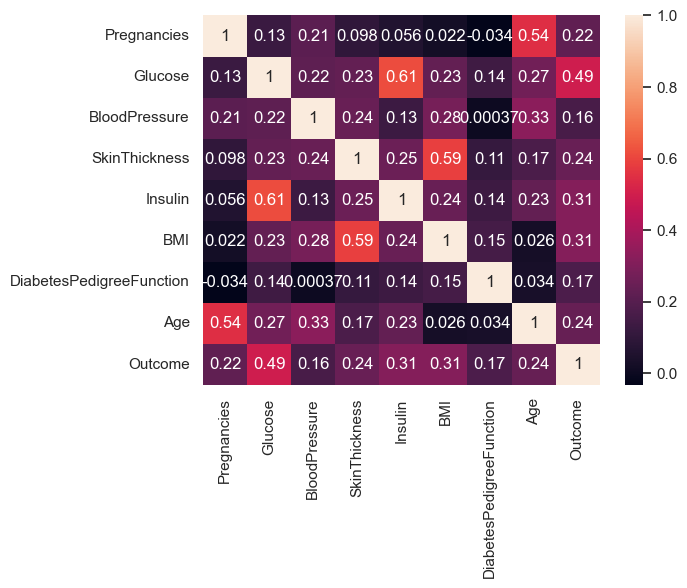

In [72]:
sns.heatmap(corr_analysis, annot = True)

There are no strong correlation between the features. The 'strongest' ones are the following (as expected):


*   Age x pregnancies (0.54) - Older women tend to have higher number of pregnancies
*   Glucose x insulin (0.33)

*   Glucose x outcome (0.47) - Women that have higher level of glucose tend to have higher level of insulin and have DM
*   Skin fold thickness x BMI (0.44) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)







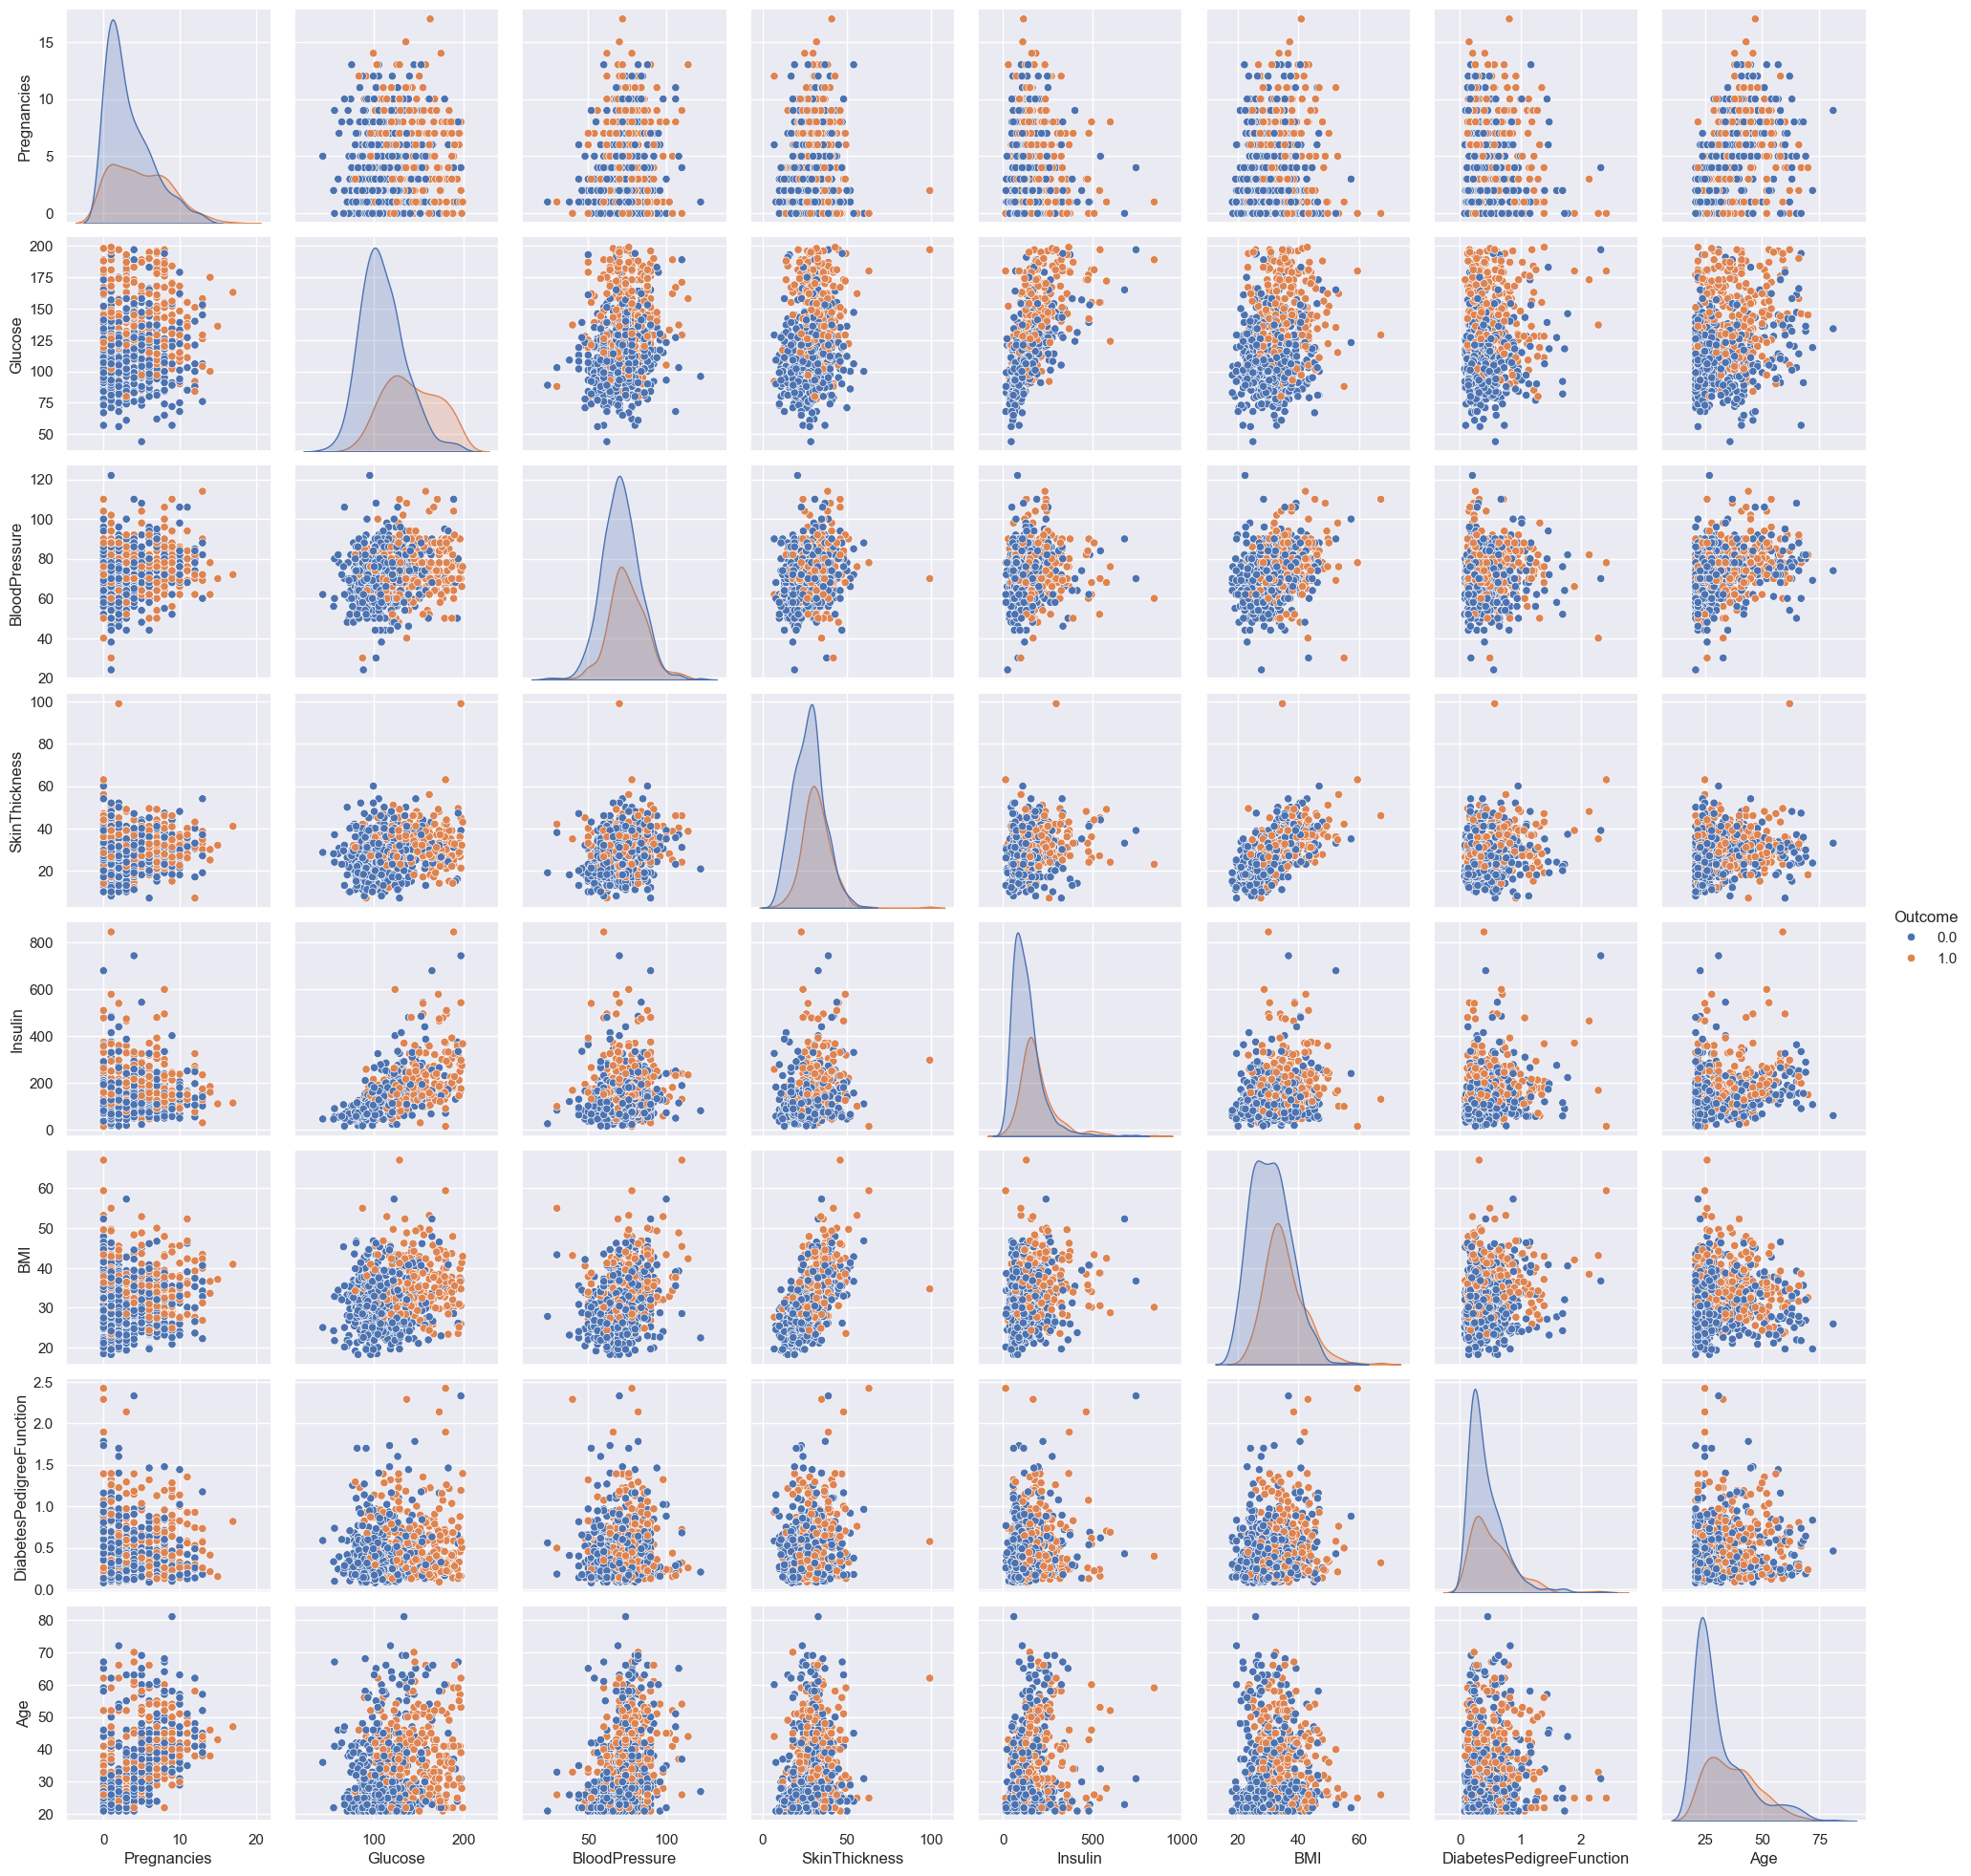

In [73]:
# Pairplot
sns.pairplot(df, hue='Outcome')

Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.

The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

# Data standardization

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X)

StandardScaler()

In [76]:
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [80]:
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
y = df['Outcome']

# Train - Test - Split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=48)

In [82]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model using Support Vector Machine (SVM) Method

In [83]:
model1 = svm.SVC(kernel='linear')
model1.fit(X_train,y_train)



Accuracy Score of the Training Data is :  0.7736156351791531
Accuracy Score of the Testing Data is :  0.7857142857142857


# Model Evaluation (Accuracy Score) for SVM

Accuracy Score on the Training Data

In [84]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print('Accuracy Score of the Training Data is : ',training_data_accuracy)

Accuracy Score of the Training Data is :  0.7736156351791531


Accuracy Score on the Testing Data

In [85]:
X_test_prediction = model1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('Accuracy Score of the Testing Data is : ',testing_data_accuracy)

Accuracy Score of the Testing Data is :  0.7857142857142857


# Evaluating Confusion Matrix for SVM

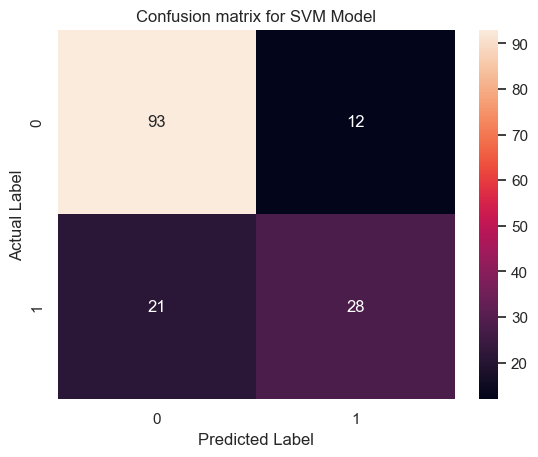

In [87]:
conf_matrix = metrics.confusion_matrix(y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Training the Model using Regression (Logistic Regression) Method

In [88]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

# Model Evaluation (Accuracy Score) for Regression Model

Accuracy Score on the Training Data

In [89]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [90]:
print('Accuracy Score of the Training Data is : ',training_data_accuracy)

Accuracy Score of the Training Data is :  0.7768729641693811


Accuracy Score on the Testing Data

In [92]:
X_test_prediction = model2.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [93]:
print('Accuracy Score of the Testing Data is : ',testing_data_accuracy)

Accuracy Score of the Testing Data is :  0.7857142857142857


# Evaluating Confusion Matrix for Regression

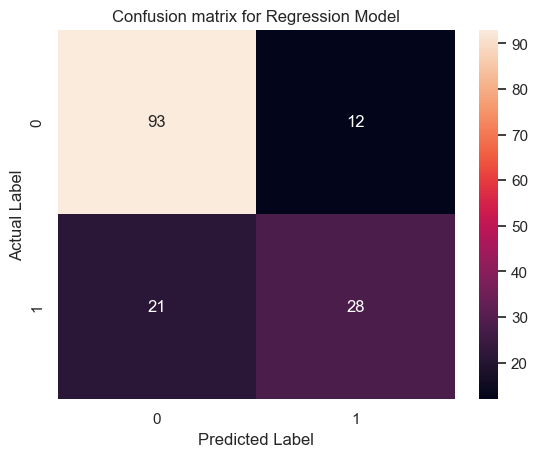

In [95]:
conf_matrix = metrics.confusion_matrix(y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Cross Validation without hyperparameter tuning

In [96]:
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
scores = cross_val_score(svm.SVC(kernel='linear'),X,y,cv = kf,scoring = 'accuracy',n_jobs =-1)
scores.mean()

np.float64(0.773389355742297)

In [97]:
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
scores1 = cross_val_score(LogisticRegression(),X_scaled,y,cv = kf,scoring = 'accuracy')
scores1.mean()

np.float64(0.7747050335285629)

# Hyperparameter tunning

In [118]:
logreg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.01,0.05,0.07,0.09, 0.1,0.2],               # Regularization strength
    'penalty': ['l1', 'l2'],                    # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga'],             # Solvers that support both l1 and l2
    'class_weight': ['balanced',None]
}

# GridSearchCV
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
grid = GridSearchCV(logreg, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Results
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Predict on test set
y_pred = grid.predict(X_test)

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.7719445555111288


In [100]:
param_grid = {
    'C': [5, 6, 7, 8,9,10],                # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'gamma': ['scale', 'auto', 0.01,0.02,0.025]  # Kernel coefficient (only used for rbf/poly/sigmoid)
}

kf = KFold(shuffle=True,n_splits=5,random_state = 48)
# Initialize GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Predict on test data
y_pred = grid.predict(X_test)

Best Parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.7751699320271891


In [101]:
param_grid = {
    'C': [7, 10,15,20],
    'kernel': [ 'poly'],
    'gamma': ['scale', 0.01, 0.02,0.03,0.04],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}

kf = KFold(shuffle=True,n_splits=5,random_state = 48)
# Initialize GridSearchCV
grid = GridSearchCV(svm.SVC(), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Predict on test data
y_pred = grid.predict(X_test)

Best Parameters: {'C': 7, 'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Best CV Accuracy: 0.7751965880314541


# Cross validation with hyperparameter tuning

In [102]:
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
scores = cross_val_score(svm.SVC(C = 7, coef0 = 0.5, degree = 2, gamma = 0.01, kernel ='poly'),X_scaled,y,cv = kf,scoring = 'accuracy')
scores.mean()

np.float64(0.7786011374246669)

In [104]:
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
scores = cross_val_score(svm.SVC(C = 5, gamma = 'scale', kernel ='linear'),X_scaled,y,cv = kf,scoring = 'accuracy')
scores.mean()

np.float64(0.7707834649011119)

In [107]:
kf = KFold(shuffle=True,n_splits=5,random_state = 48)
scores1 = cross_val_score(LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear',class_weight = None),X_scaled,y,cv = kf,scoring = 'accuracy')
scores1.mean()

np.float64(0.772099142687378)

# Training tuned svm model and evaluating `accuracy score` and `confusion matrix`

In [144]:
model1 = svm.SVC(C = 5, gamma = 'scale', kernel ='linear') 
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
accuracy_score(ypred,y_test)

0.7857142857142857

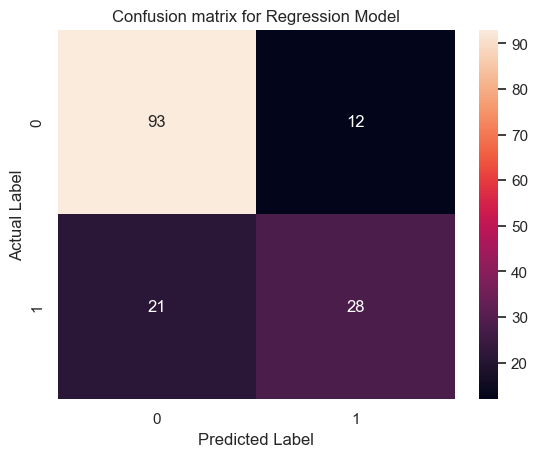

In [145]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Training tuned logistic regression model and evaluating `accuracy score` and `confusion matrix`

In [226]:
model2 = LogisticRegression(C = 0.1,penalty = 'l2', solver = 'liblinear')  #C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
accuracy_score(ypred,y_test)

0.7857142857142857

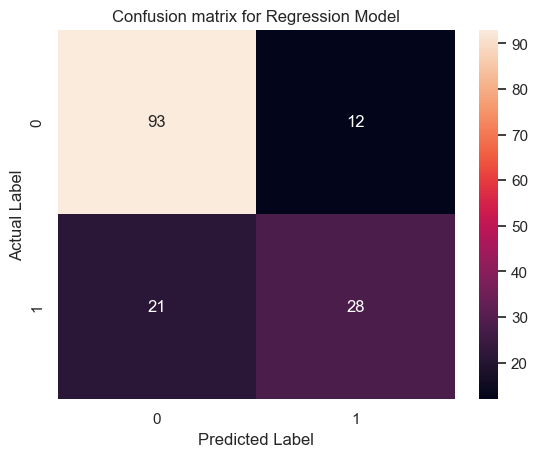

In [227]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Reducing `false positive` in regression model
And setting the threshold for reducing `FP`, it is important in medical domian to predict diabeties more precisely <br>
although you may predict non-diabeties patient as diabeties.

In [131]:
y_proba = model2.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba >= 0.35).astype(int)
accuracy_score(y_pred_thresh,y_test)

0.7532467532467533

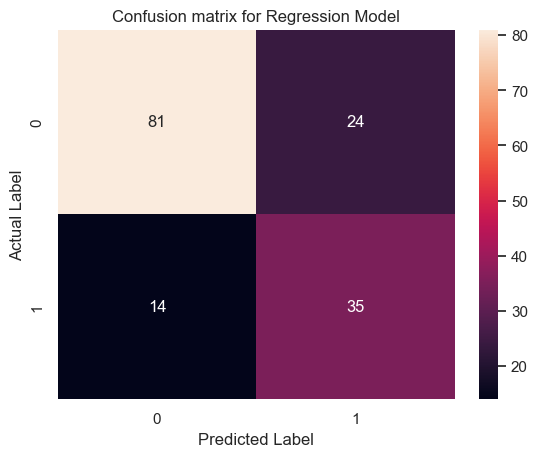

In [141]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred_thresh)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Conclusion: 

From the evaluation of Accuracy Score, we can conclude that the Value of Correlation is between (0.60,0.79). So it is Highly Correlated.

Since both Models give same value of Accuracy, I am choosing our predictive system using the Regression Model.

# Making a Predictive System

INPUT 1:

In [146]:
#input data 1
input_data = (2,197,70,45,543,30.5,0.158,53)

In [147]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [148]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [149]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [152]:
# prediction = model2.predict(std_data)
# print(prediction)
y_proba = model2.predict_proba(std_data)[:, 1]
prediction = (y_proba >= 0.35).astype(int)
print(prediction)

[1]


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [153]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Diabetic


INPUT 2

In [220]:
#input data 2
input_data2 = (1,106,74,40,90,37.4,0.31,24)
X_scaled.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [221]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

In [222]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [223]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.84488505 -0.46615631  0.25303625  1.22091023  0.08857006  0.6863059
  -0.48888564 -0.78628618]]


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [224]:
y_proba = model2.predict_proba(std_data)[:, 1]
prediction = (y_proba >= 0.35).astype(int)
print(prediction)

[0]


C:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [225]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Not Diabetic
